# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel. 

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


--- 
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [1]:
# importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv')#completa el código
usage = pd.read_csv('/datasets/usage.csv')#completa el código

In [3]:
# mostrar las primeras 5 filas de plans
plans.head(5)

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [4]:
# mostrar las primeras 5 filas de users
users.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [5]:
# mostrar las primeras 5 filas de usage
usage.head(5)

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [6]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users", users.shape)
print("usage", usage.shape)

plans (2, 8)
users (4000, 8)
usage (40000, 6)


In [7]:
# inspección de plans con .info()
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [8]:
# inspección de users con .info()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [9]:
# inspección de usage con .info()
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [10]:
# cantidad de nulos para users
print(users.isna().sum())# Cantidad de valores nulos
print(users.isna().mean())# Proporción de valores nulos

user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64
user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
city          0.11725
reg_date      0.00000
plan          0.00000
churn_date    0.88350
dtype: float64


In [11]:
# cantidad de nulos para usage
print(usage.isna().sum())# Cantidad de valores nulos
print(usage.isna().mean())# Proporción de valores nulos

id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64
id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos. 
 
 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?

 El dataset de **users** presenta valores faltantes únicamente en city (11.7%) y churn_date (88.35%).
 
 El dataset de **usage** presenta valores faltantes en date (0.125%) duartion (55.19%) y length (44.74%)

- Indica qué harías: ¿imputar, eliminar, ignorar?
  
Para el dataset de **users**:

Para city, al ser una variable categórica con una proporción moderada de faltantes, se recomienda imputar con una categoría explícita como "Unknown" para evitar pérdida de información.

En el caso de churn_date, los valores faltantes no representan datos perdidos, sino que indican usuarios activos. Por lo tanto, no deben imputarse ni eliminarse, sino utilizarse para derivar una variable binaria de churn.

Para el data set de **usage**:

Para date: se puede dejar como nulo ya que los faltantes no son representativos
En cambio, los valores faltantes en duration y length no representan datos perdidos, sino valores no aplicables dependiendo del tipo de evento (type). Por ello, se investigaria más para ver si imputar dependiendo de la relación entre si.

### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [12]:
# explorar columnas numéricas de users
print(users[['user_id', 'age']].describe())

            user_id          age
count   4000.000000  4000.000000
mean   11999.500000    33.739750
std     1154.844867   123.232257
min    10000.000000  -999.000000
25%    10999.750000    32.000000
50%    11999.500000    47.000000
75%    12999.250000    63.000000
max    13999.000000    79.000000


- La columna `user_id` su desviacióne standar es muy alta lo que significa que los IDs están distribuidos en un rango amplio
- La columna `age` presenta valores irreales ya que el mínimo es de -999, por tanto la media esta distorsionada y la desviación estandar también es alñta para una columna de edad

In [13]:
# explorar columnas numéricas de usage
print(usage[['id','user_id','duration','length']].describe())

                id       user_id      duration        length
count  40000.00000  40000.000000  17924.000000  22104.000000
mean   20000.50000  12002.405975      5.202237     52.127398
std    11547.14972   1157.279564      6.842701     56.611183
min        1.00000  10000.000000      0.000000      0.000000
25%    10000.75000  10996.000000      1.437500     37.000000
50%    20000.50000  12013.000000      3.500000     50.000000
75%    30000.25000  13005.000000      6.990000     64.000000
max    40000.00000  13999.000000    120.000000   1490.000000


- Las columnas `id` y `user_id` Sus estadísticas descriptivas no tienen significado analítico y no deben utilizarse para inferencias.
- La distribución de la columna **duration** está sesgada a la derecha, con la mayoría de las duraciones concentradas en valores bajos y pocos eventos extremadamente largos, lo que implica posible presencia de outliers y la mediana es una mejor medida que la media
- Para la columna de **length** se presenta una distribución altamente asimétrica, con valores extremos que inflan la media y la desviación estándar.

In [14]:
# explorar columnas categóricas de users
columnas_user = ['city', 'plan']
print(users[columnas_user].describe())
print()
print(users[columnas_user].value_counts(normalize=True))


          city    plan
count     3531    4000
unique       7       2
top     Bogotá  Basico
freq       808    2595

city      plan   
Bogotá    Basico     0.147833
CDMX      Basico     0.134240
Medellín  Basico     0.112716
GDL       Basico     0.084395
Bogotá    Premium    0.080997
MTY       Basico     0.077882
Cali      Basico     0.074200
CDMX      Premium    0.072501
Medellín  Premium    0.061739
Cali      Premium    0.045879
GDL       Premium    0.043047
MTY       Premium    0.037383
?         Basico     0.018408
          Premium    0.008779
dtype: float64


- La columna `city` presenta una concentración moderada en pocas ciudades, con Bogotá como principal centro de usuarios. La existencia de valores faltantes sugiere información incompleta de localización.
- La columna `plan` no tiene datos faltantes y sólo presenta dos categorias, sinedo el plan básico el predominante.

In [15]:
# explorar columna categórica de usage
usage['type']
print (usage['type'].describe())
print()
print(usage['type'].value_counts(normalize=True))# completa el código

count     40000
unique        2
top        text
freq      22092
Name: type, dtype: object

text    0.5523
call    0.4477
Name: type, dtype: float64


- La columna `type` no presenta un desbalance severo de clases, lo que la hace adecuada para análisis comparativos y modelado sin necesidad de técnicas especiales de balanceo. Muestra una distribución relativamente balanceada, con una ligera predominancia de eventos de tipo text (55.2%) frente a call (44.8%).


---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso. 

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels?

   En la columna **city** del dataset **users** fue en donde se encontraron datos faltantes y sentinels
- ¿Qué acción tomarías?

Para la columna city se pueden renombrar los faltantes como 'Unknown' . Las demás columnas no presentan valores faltantes o datos extremos 

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [16]:

# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users['reg_date'], errors='coerce') # completa el código
users['reg_date'].describe()

count                    4000
unique                   3961
top       2026-05-10 00:00:00
freq                       40
first     2022-01-01 00:00:00
last      2026-05-10 00:00:00
Name: reg_date, dtype: object

In [17]:
# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage['date'])# completa el código

In [25]:
# Revisar los años presentes en `reg_date` de users

print(users['reg_date'].dt.year.value_counts().sort_index())
print()
print(users['reg_date'].dt.year.value_counts(normalize=True))

2022    1314
2023    1316
2024    1330
2026      40
Name: reg_date, dtype: int64

2024    0.3325
2023    0.3290
2022    0.3285
2026    0.0100
Name: reg_date, dtype: float64


En `reg_date`, los datos se registran en 2022, 2023,2024 y 2026. Al existir año 2026 que no es un año que haya transcurrido, se puede tratar de datos incorrectos

In [19]:
# Revisar los años presentes en `date` de usage
print(usage['date'].dt.year.unique)

print()
print(usage['date'].dt.year.value_counts(normalize=True))


<bound method Series.unique of 0        2024.0
1        2024.0
2        2024.0
3        2024.0
4        2024.0
          ...  
39995    2024.0
39996    2024.0
39997    2024.0
39998    2024.0
39999    2024.0
Name: date, Length: 40000, dtype: float64>

2024.0    1.0
Name: date, dtype: float64


En `date`,s 
Basaremos el análisis en estas fechas.

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos)

- para el dataset **users** existen datos registrados para el año 2026 el cual aún no es un año transcurrido por lo que puede generar inconsistencia en el analisis

- Para el dataset **usage** solo existe un año registrado 2024
- ¿Qué harías con ellas?

- Para el tema del año 2026, haría una imputación usando la media, ya que no existen datos extremos

---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [20]:

# Reemplazar -999 por la mediana de age
age_mediana = users['age'].median()
users['age'] = users['age'].replace(-999, age_mediana)

# Verificar cambios
users['age'].describe()


count    4000.000000
mean       48.122250
std        17.690408
min        18.000000
25%        33.000000
50%        47.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [21]:

# Reemplazar ? por NA en city

users['city'] = users['city'].replace('?', pd.NA)
# Verificar cambios



users['city'].value_counts()


Bogotá      808
CDMX        730
Medellín    616
GDL         450
Cali        424
MTY         407
Name: city, dtype: int64

In [26]:
# Marcar fechas futuras como NA para reg_date
fechas_futuras = users['reg_date'].dt.year > 2024
users.loc[fechas_futuras, 'reg_date'] = pd.NaT

#Verificar cambios
print(users['reg_date'].dt.year.value_counts().sort_index())


2022.0    1314
2023.0    1316
2024.0    1330
Name: reg_date, dtype: int64


### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [ ]:


# Verificación MAR en usage (Missing At Random) para duration
usage.groupby('type')['duration'].agg(lambda x: x.isna().mean()).sort_values(ascending=False).head(10)



In [ ]:
# Verificación MAR en usage (Missing At Random) para length
usage.groupby('type')['length'].agg(lambda x: x.isna().mean()).sort_values(ascending=False).head(10)

Haz doble clic aquíy escribe que tu diagnostico de nulos en `duration` y `length`:

Ambas variables muestran MAR fuerte:

Missing depende completamente del tipo de servicio
No es aleatorio
es por la naturaleza del servicio
Patrón predecible y lógico
Estrategia de limpieza para ConnectaTel
Para duration:
- Calls: Mantener valores (están completos)
- Text: Asignar 0 o crear columna separada

Para length:
- Text: Mantener valores (están completos)  
- Calls: Asignar 0 o NA (las llamadas no tienen "longitud")

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico. 

**Instrucciones:**: 
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [28]:



# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas


# Agrupar información por usuario

usage_agg = usage.groupby('user_id').agg({
    'is_text': 'sum',  # cuenta mensajes
    'is_call': 'sum' ,
    'duration':'sum'# cuenta llamadas
}).reset_index()


# observar resultado
usage_agg.head(3)




,user_id,is_text,is_call,duration
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [29]:
# Renombrar columnas
usage_agg = usage_agg.rename(columns={
    'is_text': 'cant_mensajes',
    'is_call': 'cant_llamadas',
    'duration': 'cant_minutos_llamada'
})
# observar resultado
usage_agg.head(3)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [30]:
# Combinar la tabla agregada con el dataset de usuarios
user_profile = users.merge(usage_agg, on='user_id', how='inner')
user_profile.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7,3,23.70
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5,10,33.18
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5,2,10.74
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11,3,8.99
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4,3,8.01


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [34]:
# Resumen estadístico de las columnas numéricas
print(user_profile[['age','cant_mensajes','cant_llamadas','cant_minutos_llamada']].describe())

               age  cant_mensajes  cant_llamadas  cant_minutos_llamada
count  3999.000000    3999.000000    3999.000000           3999.000000
mean     48.124531       5.524381       4.478120             23.317054
std      17.692032       2.358416       2.144238             18.168095
min      18.000000       0.000000       0.000000              0.000000
25%      33.000000       4.000000       3.000000             11.120000
50%      47.000000       5.000000       4.000000             19.780000
75%      63.000000       7.000000       6.000000             31.415000
max      79.000000      17.000000      15.000000            155.690000


In [36]:
# Distribución porcentual del tipo de plan
print(user_profile['plan'].value_counts(normalize=True)*100)

Basico     64.866217
Premium    35.133783
Name: plan, dtype: float64


---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada` 

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda) 

**Hint**  
Para cada histograma, 
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

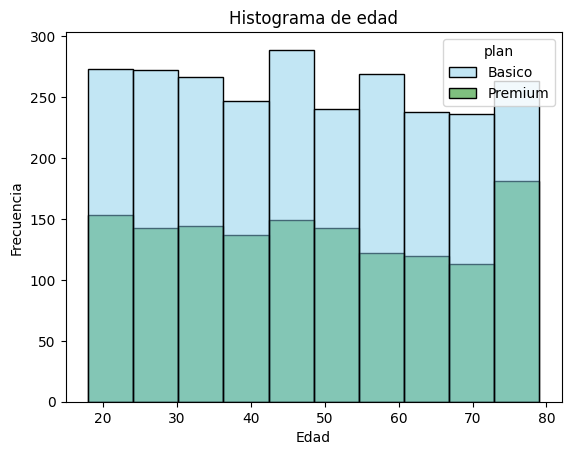

In [47]:
# Histograma para visualizar la edad (age)

sns.histplot(data=user_profile, x='age', hue='plan', bins=10, palette=['skyblue','green'], edgecolor='black')
plt.title('Histograma de edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()



💡Insights: 
- Distribución donde se puede apreciar que usuarios entre 70 y 80 años, tienen más preferencia por plan premium, aunque hay mayor cantidad de usuarios que están en los 40's

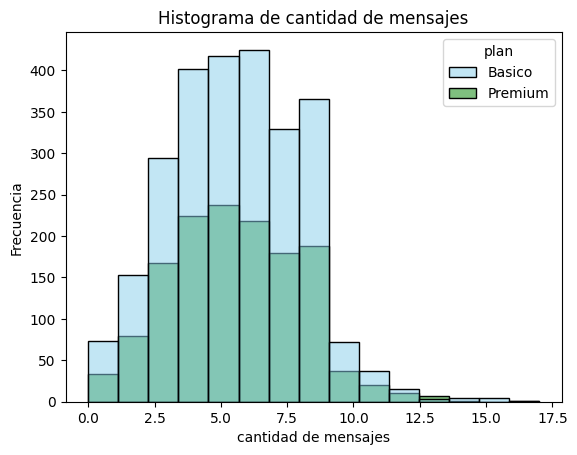

In [49]:
# Histograma para visualizar la cant_mensajes

sns.histplot(data=user_profile, x='cant_mensajes', hue='plan', bins=15, palette=['skyblue','green'], edgecolor='black')
plt.title('Histograma de cantidad de mensajes')
plt.xlabel('cantidad de mensajes')
plt.ylabel('Frecuencia')
plt.show()


💡Insights: 
- El histograma muestra distribuciones asimétricas a la derecha para ambos planes, con una alta concentración de usuarios en rangos bajos de mensajería. Existe un fuerte solapamiento entre los planes Básico y Premium, lo que indica que la cantidad de mensajes no es un factor diferenciador claro entre planes. El plan Básico presenta mayor dispersión y valores extremos, mientras que el Premium muestra un comportamiento más estable. 

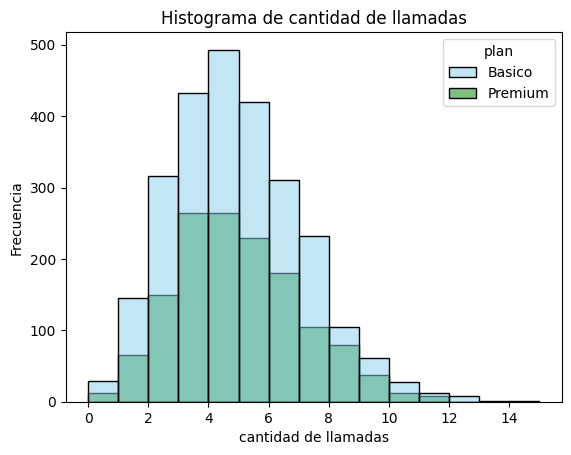

In [50]:
# Histograma para visualizar la cant_llamadas

sns.histplot(data=user_profile, x='cant_llamadas', hue='plan', bins=15, palette=['skyblue','green'], edgecolor='black')
plt.title('Histograma de cantidad de llamadas')
plt.xlabel('cantidad de llamadas')
plt.ylabel('Frecuencia')
plt.show()


💡Insights: 
- El histograma de llamadas muestra distribuciones asimétricas a la derecha para ambos planes, con un fuerte solapamiento entre Básico y Premium. El plan Básico presenta mayor dispersión y más valores extremos, mientras que el plan Premium exhibe un patrón de uso más estable. La cantidad de llamadas no constituye un factor diferenciador claro entre planes.

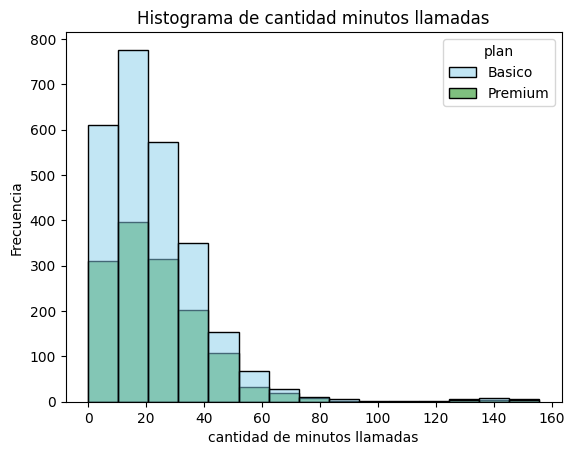

In [51]:
# Histograma para visualizar la cant_minutos_llamada
sns.histplot(data=user_profile, x='cant_minutos_llamada', hue='plan', bins=15, palette=['skyblue','green'], edgecolor='black')
plt.title('Histograma de cantidad minutos llamadas')
plt.xlabel('cantidad de minutos llamadas')
plt.ylabel('Frecuencia')
plt.show()

💡Insights: 
-El histograma de minutos de llamadas presenta una distribución fuertemente sesgada a la derecha para ambos planes. Sin embargo, se observa que los usuarios Premium tienden a concentrarse en rangos más altos de minutos totales, con menor dispersión relativa que los usuarios del plan Básico. Esto sugiere que el tiempo de llamadas es una variable más discriminante entre planes que el número de llamadas.

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age` 
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

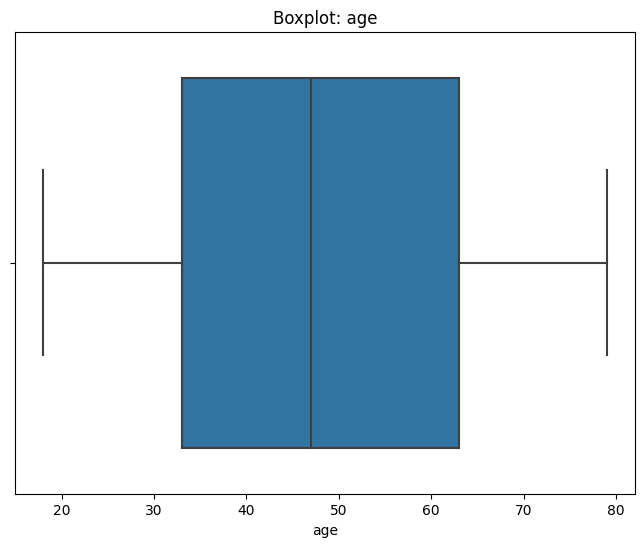

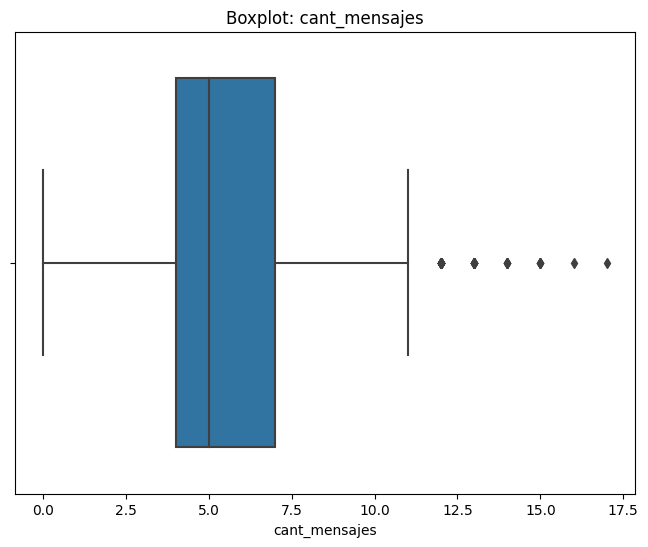

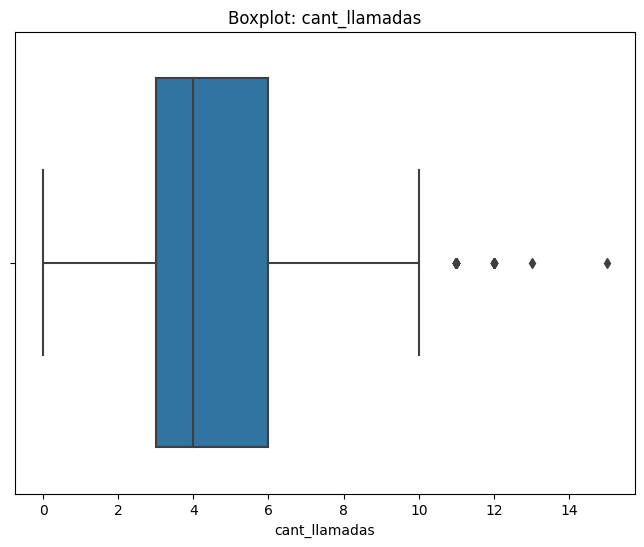

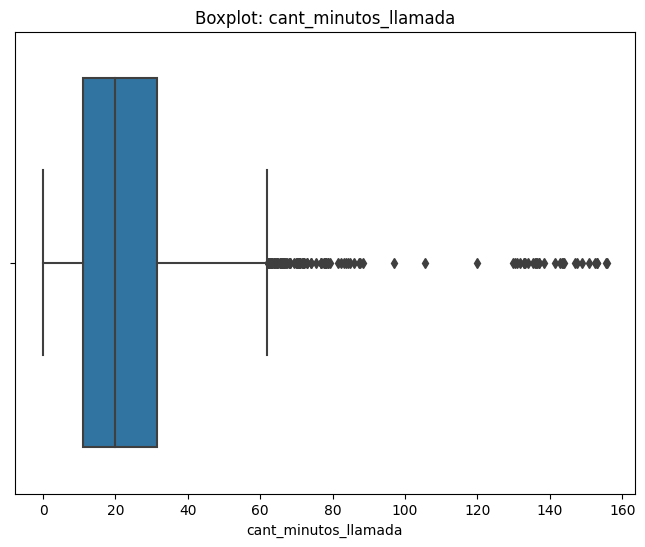

In [54]:

# Visualizando usando BoxPlot 
columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_numericas:
    plt.figure(figsize=(8, 6))  # Opcional: para mejor tamaño
    sns.boxplot(data=user_profile, x=col)
    plt.title(f'Boxplot: {col}')
    plt.show()


💡Insights: 
- Age:no outliers y los datos estan bien distribuidos
- cant_mensajes: tiene outliers y la mediana se encuentra mas en 5 
- cant_llamadas: tiene outliers y la mediana se encuentra mas en 4
- cant_minutos_llamada: tiene outliers y la mediana se encuentra en 20

In [57]:

# Calcular límites con el método IQR

columnas_limites = ['cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']
for col in columnas_limites:
    Q1 = user_profile[col].quantile(0.25)
    Q3 = user_profile[col].quantile(0.75)
    IQR = Q3-Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    
    # Identificar outliers
    outliers = user_profile[(user_profile[col] < lower) | (user_profile[col] > upper)]
    
    print(f"\n=== ANÁLISIS DE OUTLIERS: {col} ===")
    print(f"Q1: {Q1:.2f}")
    print(f"Q3: {Q3:.2f}")
    print(f"IQR: {IQR:.2f}")
    print(f"Límite inferior: {lower:.2f}")
    print(f"Límite superior: {upper:.2f}")
    print(f"Outliers encontrados: {len(outliers)} de {len(user_profile)} registros")
    
    if len(outliers) > 0:
        print(f"Porcentaje de outliers: {len(outliers)/len(user_profile)*100:.1f}%")






=== ANÁLISIS DE OUTLIERS: cant_mensajes ===
Q1: 4.00
Q3: 7.00
IQR: 3.00
Límite inferior: -0.50
Límite superior: 11.50
Outliers encontrados: 46 de 3999 registros
Porcentaje de outliers: 1.2%

=== ANÁLISIS DE OUTLIERS: cant_llamadas ===
Q1: 3.00
Q3: 6.00
IQR: 3.00
Límite inferior: -1.50
Límite superior: 10.50
Outliers encontrados: 30 de 3999 registros
Porcentaje de outliers: 0.8%

=== ANÁLISIS DE OUTLIERS: cant_minutos_llamada ===
Q1: 11.12
Q3: 31.41
IQR: 20.30
Límite inferior: -19.32
Límite superior: 61.86
Outliers encontrados: 109 de 3999 registros
Porcentaje de outliers: 2.7%


In [56]:
# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()

,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,3999.000000,3999.000000,3999.000000
mean,5.524381,4.478120,23.317054
std,2.358416,2.144238,18.168095
min,0.000000,0.000000,0.000000
25%,4.000000,3.000000,11.120000
50%,5.000000,4.000000,19.780000
75%,7.000000,6.000000,31.415000
max,17.000000,15.000000,155.690000


💡Insights: 
- cant_mensajes: mantener o no outliers, porqué?

  Mantener los valores
  Usar mediana y percentiles para describir
  No son errores de captura
  Aportan información sobre usuarios heavy users
  Eliminarlos sesgaría el promedio hacia abajo
  
- cant_llamadas: mantener o no outliers, porqué?

  Los outliers son usuarios con frecuencia de llamadas alta
  Impacto estadístico muy bajo
  Mantener outliers ya que representan comportamiento real y eliminarlos no mejora la calidad del dato

  
- cant_minutos_llamada: mantener o no outliers, porqué?

  Los outliers representan usuarios con llamadas muy largas
  Mayor proporción de outliers que las otras variables
  Impactan fuertemente la media
  La decisión sería mantener pero tratar
 Por qué no eliminar:
 Son plausibles (llamadas largas existen)
 Eliminarlos ocultaría usuarios intensivos
 Pueden ser clave para churn y upsell
 Por qué tratar:
 Inflan la media
Usar mediana como medida principal

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [58]:
# Crear columna grupo_uso


user_profile['grupo_uso'] = np.where(
    (user_profile['cant_llamadas'] < 5) & (user_profile['cant_mensajes'] < 5), 
    'Bajo uso',
    np.where(
        (user_profile['cant_llamadas'] < 10) & (user_profile['cant_mensajes'] < 10), 
        'Uso medio',
        'Alto uso'
    )
)


In [59]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7,3,23.70,Uso medio
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5,10,33.18,Alto uso
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5,2,10.74,Uso medio
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11,3,8.99,Alto uso
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4,3,8.01,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [60]:
# Crear columna grupo_edad
user_profile['grupo_edad'] = np.where(
    (user_profile['age'] < 30), 
    'Joven',
    np.where(
        (user_profile['age'] < 60), 
        'Adulto',
        'Adulto mayor'
    )
)

In [61]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso,grupo_edad
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7,3,23.70,Uso medio,Adulto
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5,10,33.18,Alto uso,Adulto
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5,2,10.74,Uso medio,Adulto
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11,3,8.99,Alto uso,Adulto mayor
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4,3,8.01,Bajo uso,Adulto mayor


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

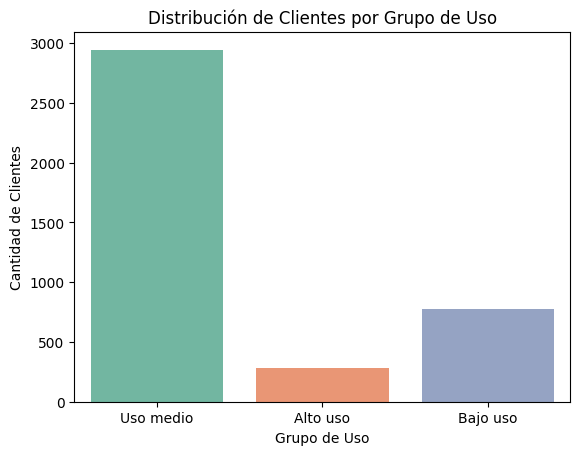

In [62]:
# Visualización de los segmentos por uso
sns.countplot(data=user_profile, x='grupo_uso', palette='Set2')
plt.title('Distribución de Clientes por Grupo de Uso')
plt.xlabel('Grupo de Uso')
plt.ylabel('Cantidad de Clientes')
plt.show()


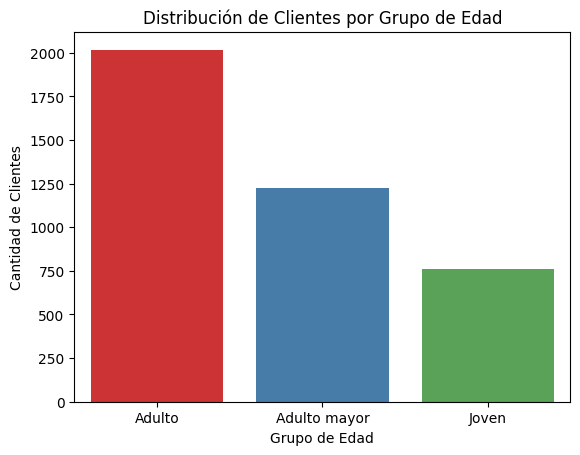

In [63]:
# Visualización de los segmentos por edad
sns.countplot(data=user_profile, x='grupo_edad', palette='Set1')
plt.title('Distribución de Clientes por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Cantidad de Clientes')
plt.show()


---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:** 
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?


- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?  
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?  
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?


- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?

✍️ **Escribe aquí tu análisis ejecutivo:**

### Análisis ejecutivo

⚠️ **Problemas detectados en los datos**
-El dataset **users** presenta valores faltantes únicamente en city (11.7%) y churn_date (88.35%).

-El dataset **usage** presenta valores faltantes en date (0.125%), duration (55.19%) y length (44.74%).

🔍 **Segmentos por Edad**
A partir de los patrones de uso (mensajes, llamadas y minutos), se pueden identificar tres grandes
Segmento 1: Usuarios de bajo uso

Comportamiento:

- Pocos mensajes (≤ Q1)

- Pocas llamadas y pocos minutos

Perfil típico:

- Clientes jóvenes con preferencia por apps de mensajería externas o

- Clientes mayores con uso ocasional del servicio


Segmento 2: Usuarios de uso moderado (segmento mayoritario)

Comportamiento:

- Uso concentrado entre Q1 y Q3

- Valores cercanos a la mediana:

- ~5 mensajes

- ~4 llamadas

- ~20 minutos

Perfil típico:

- Adultos en edad laboral

- Uso equilibrado y predecible


Segmento 3: Usuarios intensivos (outliers)

Comportamiento:

- Valores por encima del límite superior:

- Hasta 17 mensajes

- Hasta 15 llamadas

- Hasta 155 minutos

Perfil típico:

- Clientes que usan el teléfono como herramienta principal (trabajo, ventas, soporte)

- Posiblemente edades medias, alta dependencia del servicio


📊 **Segmentos por Nivel de Uso**
-Minutos de llamada es la variable con más outliers (2.7%)

Indica que hay clientes con una dependencia muy alta de llamadas de voz

Menos outliers en mensajes y llamadas

Sugiere que el uso extremo se concentra más en duración, no en frecuencia


➡️ Esto sugiere que ...

Estos outliers no son errores, sino clientes reales con necesidades específicas

Eliminarlos implicaría:

Perder información clave

Diseñar planes que no cubren a clientes de alto valor

Mantenerlos permite:

Detectar nichos premium

Ajustar políticas de uso justo
💡 **Recomendaciones**


- Crear planes diferenciados por segmento

- Plan básico económico → usuarios de bajo uso

 - Plan estándar → usuarios moderados

- Plan premium o ilimitado → usuarios intensivos

- Planes enfocados en minutos de llamada

Dado que el uso extremo se concentra en duración, no solo en número de llamadas

Identificar clientes cercanos al límite superior (Q3) y ofrecerles upgrades antes de que se conviertan en outliers

Evitar eliminar outliers en análisis futuros

Mantenerlos para segmentación

Personalización por perfil de uso

No todos los clientes valoran lo mismo: algunos mensajes, otros minutos

---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`